In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

pd.pandas.set_option('display.max_columns', None)

df_all = pd.read_csv("openweatherchennai.csv")
print(df_all.info())
df_all.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388235 entries, 0 to 388234
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   388235 non-null  int64  
 1   dt_iso               388235 non-null  object 
 2   timezone             388235 non-null  int64  
 3   city_name            388235 non-null  object 
 4   lat                  388235 non-null  float64
 5   lon                  388235 non-null  float64
 6   temp                 388235 non-null  float64
 7   visibility           305156 non-null  float64
 8   dew_point            388235 non-null  float64
 9   feels_like           388235 non-null  float64
 10  temp_min             388235 non-null  float64
 11  temp_max             388235 non-null  float64
 12  pressure             388235 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

(388235, 28)

In [2]:
df_all.head()

dt                         dt_iso  timezone city_name       lat  \
0  283996800  1979-01-01 00:00:00 +0000 UTC     19800   Chennai  13.08268   
1  284000400  1979-01-01 01:00:00 +0000 UTC     19800   Chennai  13.08268   
2  284004000  1979-01-01 02:00:00 +0000 UTC     19800   Chennai  13.08268   
3  284007600  1979-01-01 03:00:00 +0000 UTC     19800   Chennai  13.08268   
4  284011200  1979-01-01 04:00:00 +0000 UTC     19800   Chennai  13.08268   

         lon   temp  visibility  dew_point  feels_like  temp_min  temp_max  \
0  80.270718  23.70      2000.0      21.59       24.42     21.04     24.89   
1  80.270718  23.65      2000.0      21.54       24.37     21.04     24.87   
2  80.270718  23.25         NaN      20.97       23.90     23.25     23.25   
3  80.270718  25.63     10000.0      23.49       26.55     23.04     26.58   
4  80.270718  25.70     10000.0      23.56       26.62     23.04     26.51   

   pressure  sea_level  grnd_level  humidity  wind_speed  wind_deg  wind_gust  \
0      1014        NaN         NaN        88        0.50       360        NaN   
1      1014        NaN         NaN        88        0.50       360        NaN   
2      1015        NaN         NaN        87        2.84        28        NaN   
3      1016        NaN         NaN        88        1.00       320        NaN   
4      1016        NaN         NaN        88        1.00       320        NaN   

   rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id weather_main  \
0      NaN      NaN      NaN      NaN          20         721         Haze   
1      NaN      NaN      NaN      NaN          20         721         Haze   
2      NaN      NaN      NaN      NaN          18         801       Clouds   
3      NaN      NaN      NaN      NaN          20         801       Clouds   
4      NaN      NaN      NaN      NaN          20         801       Clouds   

  weather_description weather_icon  
0                haze          50n  
1                haze          50n  
2          few clouds          02d  
3          few clouds          02d  
4          few clouds          02d

Viewing the data, and the non-null entries in each column and their type
### Next
We have multiple data points for the same time stamp. Thus, we drop the duplicates and keep the first entry for the particular time-stamp. 
The number of unique date entries are 3,78,888

In [3]:
df_all.drop_duplicates(subset='dt', keep='first', inplace=True)
df_all.shape

(378888, 28)

Removing columns which have zero or only one value (category/NaN)

In [4]:
for feature in df_all.columns:
    print(feature + ' ' + f'{df_all[feature].nunique()}')

dt 378888
dt_iso 378888
timezone 1
city_name 1
lat 1
lon 1
temp 1815
visibility 80
dew_point 2321
feels_like 2448
temp_min 1809
temp_max 1792
pressure 45
sea_level 0
grnd_level 0
humidity 90
wind_speed 971
wind_deg 361
wind_gust 101
rain_1h 837
rain_3h 25
snow_1h 0
snow_3h 0
clouds_all 101
weather_id 29
weather_main 12
weather_description 31
weather_icon 17


In [5]:
df_all.columns
drop_columns = [feature for feature in df_all.columns if (df_all[feature].nunique()<=1)]
drop_columns.append('dt')
print(drop_columns)

['timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level', 'snow_1h', 'snow_3h', 'dt']


In [6]:
df = df_all.drop(columns = drop_columns)
df.head()

dt_iso   temp  visibility  dew_point  feels_like  \
0  1979-01-01 00:00:00 +0000 UTC  23.70      2000.0      21.59       24.42   
1  1979-01-01 01:00:00 +0000 UTC  23.65      2000.0      21.54       24.37   
2  1979-01-01 02:00:00 +0000 UTC  23.25         NaN      20.97       23.90   
3  1979-01-01 03:00:00 +0000 UTC  25.63     10000.0      23.49       26.55   
4  1979-01-01 04:00:00 +0000 UTC  25.70     10000.0      23.56       26.62   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0     21.04     24.89      1014        88        0.50       360        NaN   
1     21.04     24.87      1014        88        0.50       360        NaN   
2     23.25     23.25      1015        87        2.84        28        NaN   
3     23.04     26.58      1016        88        1.00       320        NaN   
4     23.04     26.51      1016        88        1.00       320        NaN   

   rain_1h  rain_3h  clouds_all  weather_id weather_main weather_description  \
0      NaN      NaN          20         721         Haze                haze   
1      NaN      NaN          20         721         Haze                haze   
2      NaN      NaN          18         801       Clouds          few clouds   
3      NaN      NaN          20         801       Clouds          few clouds   
4      NaN      NaN          20         801       Clouds          few clouds   

  weather_icon  
0          50n  
1          50n  
2          02d  
3          02d  
4          02d

Removing the +UTC from dt_iso and converting the string object to datetime object

In [7]:
df.dt_iso = df.dt_iso.str[:-3]

In [8]:
df.dt_iso = pd.to_datetime(df['dt_iso'], utc=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378888 entries, 0 to 388234
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   dt_iso               378888 non-null  datetime64[ns, UTC]
 1   temp                 378888 non-null  float64            
 2   visibility           295842 non-null  float64            
 3   dew_point            378888 non-null  float64            
 4   feels_like           378888 non-null  float64            
 5   temp_min             378888 non-null  float64            
 6   temp_max             378888 non-null  float64            
 7   pressure             378888 non-null  int64              
 8   humidity             378888 non-null  int64              
 9   wind_speed           378888 non-null  float64            
 10  wind_deg             378888 non-null  int64              
 11  wind_gust            23737 non-null   float64            
 12  ra

Checking the percentage of missing values

In [10]:
import numpy as np

for feature in df.columns:
    print(feature, np.round(df[feature].isnull().mean(), 4)*100,  ' % missing values')

dt_iso 0.0  % missing values
temp 0.0  % missing values
visibility 21.92  % missing values
dew_point 0.0  % missing values
feels_like 0.0  % missing values
temp_min 0.0  % missing values
temp_max 0.0  % missing values
pressure 0.0  % missing values
humidity 0.0  % missing values
wind_speed 0.0  % missing values
wind_deg 0.0  % missing values
wind_gust 93.74  % missing values
rain_1h 87.59  % missing values
rain_3h 99.95  % missing values
clouds_all 0.0  % missing values
weather_id 0.0  % missing values
weather_main 0.0  % missing values
weather_description 0.0  % missing values
weather_icon 0.0  % missing values


In [11]:
df.drop(columns='rain_3h', inplace=True)

In [12]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
features_with_na

['visibility', 'wind_gust', 'rain_1h']

As rain_3h has very less percentage of non-null values, we shall drop that column

Checking for numerical and categorical features

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features.remove('dt_iso')

In [14]:
categorical_features = [features for features in df.columns if features not in numerical_features]
categorical_features.remove('dt_iso')
for feature in categorical_features:
    print(df[feature].nunique())

12
31
17


### Checking effect of Null Values
We create a copy of df and replace NaN values in features with NaN values and 0 for non-Null values.<br>We then groupby these features and the median value of other features of the 1 group and 0 group are compared.<br>If the difference in median is greater than 15% of the smaller value, we consider it to be important, thus replacement of the Null values must be done carefully. (The pair which had difference greater than 15% is printed)

In [15]:
dum_data = df.copy()
for feature in features_with_na:
    dum_data[feature] = np.where(dum_data[feature].isnull(), 1, 0)

dum_data.head()

dt_iso   temp  visibility  dew_point  feels_like  \
0 1979-01-01 00:00:00+00:00  23.70           0      21.59       24.42   
1 1979-01-01 01:00:00+00:00  23.65           0      21.54       24.37   
2 1979-01-01 02:00:00+00:00  23.25           1      20.97       23.90   
3 1979-01-01 03:00:00+00:00  25.63           0      23.49       26.55   
4 1979-01-01 04:00:00+00:00  25.70           0      23.56       26.62   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0     21.04     24.89      1014        88        0.50       360          1   
1     21.04     24.87      1014        88        0.50       360          1   
2     23.25     23.25      1015        87        2.84        28          1   
3     23.04     26.58      1016        88        1.00       320          1   
4     23.04     26.51      1016        88        1.00       320          1   

   rain_1h  clouds_all  weather_id weather_main weather_description  \
0        1          20         721         Haze                haze   
1        1          20         721         Haze                haze   
2        1          18         801       Clouds          few clouds   
3        1          20         801       Clouds          few clouds   
4        1          20         801       Clouds          few clouds   

  weather_icon  
0          50n  
1          50n  
2          02d  
3          02d  
4          02d

In [16]:
important_pairs = []
for feat in features_with_na:
    for feature in numerical_features:
        if feature in features_with_na:
            continue
        grouped_data = dum_data.groupby(feat)[feature].median()
        # grouped_data.plot.bar()
        # plt.title(feat + ' with ' + feature)
        # plt.show()
        a = max(grouped_data[0], grouped_data[1])
        b = min(grouped_data[0], grouped_data[1])
        if((a-b)>(0.15*b)):
            important_pairs.append([feat, feature])
print(*important_pairs, sep='\n')
##after doing the above, the plots which made a difference are (wind speed with visibility), (clouds all with visibility), 

['visibility', 'wind_speed']
['visibility', 'clouds_all']
['wind_gust', 'wind_speed']
['rain_1h', 'wind_deg']
['rain_1h', 'clouds_all']
['rain_1h', 'weather_id']


Checking all features which have less than 25 unique values. If so, we can consider them to be discrete

In [17]:
discrete_features = []
for feature in df.columns:
    if df[feature].nunique()<25:
        discrete_features.append(feature)
discrete_features

['weather_main', 'weather_icon']

Creating features - Year, Month, Day and Hour. Minute and Seconds are always 0 so not needed.

In [18]:
df.sort_values('dt_iso', inplace=True)

In [28]:
year = []
month = []
day = []
hour = []
for i in df.dt_iso:
    year.append(i.year)
    month.append(i.month)
    day.append(i.day)
    hour.append(i.hour)
df['year'] = year
df['month'] = month
df['day'] = day
df['hour'] = hour
df.head()

dt_iso   temp  visibility  dew_point  feels_like  \
0 1979-01-01 00:00:00+00:00  23.70      2000.0      21.59       24.42   
1 1979-01-01 01:00:00+00:00  23.65      2000.0      21.54       24.37   
2 1979-01-01 02:00:00+00:00  23.25         NaN      20.97       23.90   
3 1979-01-01 03:00:00+00:00  25.63     10000.0      23.49       26.55   
4 1979-01-01 04:00:00+00:00  25.70     10000.0      23.56       26.62   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0     21.04     24.89      1014        88        0.50       360        NaN   
1     21.04     24.87      1014        88        0.50       360        NaN   
2     23.25     23.25      1015        87        2.84        28        NaN   
3     23.04     26.58      1016        88        1.00       320        NaN   
4     23.04     26.51      1016        88        1.00       320        NaN   

   rain_1h  clouds_all  weather_id weather_main weather_description  \
0      NaN          20         721         Haze                haze   
1      NaN          20         721         Haze                haze   
2      NaN          18         801       Clouds          few clouds   
3      NaN          20         801       Clouds          few clouds   
4      NaN          20         801       Clouds          few clouds   

  weather_icon  year  month  day  hour  
0          50n  1979      1    1     0  
1          50n  1979      1    1     1  
2          02d  1979      1    1     2  
3          02d  1979      1    1     3  
4          02d  1979      1    1     4

In [88]:
df.to_csv('copy1.csv')

Leap Years have 24 extra data point in their year

In [87]:
dff = df.groupby(year)['year'].count()
for i in range(1979,2023):
    if dff[i]==8784:
        print(i)

1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
2020


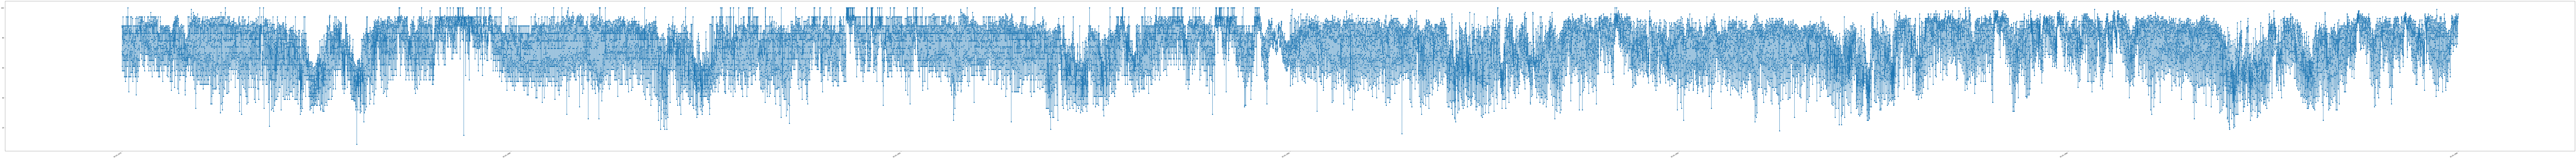

In [21]:
plt.figure(figsize=(300,20))
plt.plot_date(df[df.year<1985].dt_iso, df[df.year<1985].humidity, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
# locator = mpl_dates.DayLocator()
# plt.gca().xaxis.set_major_locator(locator)